In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

AD_EEG_Data = pd.read_csv(os.path.join("EEG_human","ad_eeg_all.csv"))
Control_EEG_Data = pd.read_csv(os.path.join("EEG_human","control_eeg_all.csv"))

In [2]:
column_suffix = ["Fp1", "Fp2", "F3"]
row_means = {}

for suffix in column_suffix:
    row_means[f'mean_{suffix}'] = AD_EEG_Data.filter(like=f'-{suffix}').iloc[:10000].mean(axis=1)

averaged_AD_EEG_df = pd.DataFrame(row_means)
averaged_AD_EEG_df

,mean_Fp1,mean_Fp2,mean_F3
0,0.375406,1.583929,-0.459553
1,-1.240715,-0.037374,-2.344625
2,-2.732927,-1.489711,-4.068081
3,-3.931286,-2.575826,-5.434889
4,-4.719661,-3.167147,-6.314832
...,...,...,...
9995,1.285158,0.118598,3.985164
9996,1.141975,0.093788,4.133926
9997,1.090637,0.195253,4.375679
9998,1.149185,0.405244,4.669106


In [3]:
column_suffix = ["Fp1", "Fp2", "F3"]
row_means = {}

for suffix in column_suffix:
    row_means[f'mean_{suffix}'] = Control_EEG_Data.filter(like=f'-{suffix}').iloc[:10000].mean(axis=1)

averaged_Control_EEG_df = pd.DataFrame(row_means)
averaged_Control_EEG_df

,mean_Fp1,mean_Fp2,mean_F3
0,2.127751,1.103037,2.769741
1,2.784379,1.563120,3.063601
2,3.177975,1.735324,2.959702
3,3.249903,1.599203,2.475832
4,2.993342,1.191343,1.708136
...,...,...,...
9995,4.741675,4.474019,4.988809
9996,4.744243,4.628991,5.088867
9997,4.688398,4.818805,5.101800
9998,4.596929,5.010880,5.028115


(0.0, 4.0)

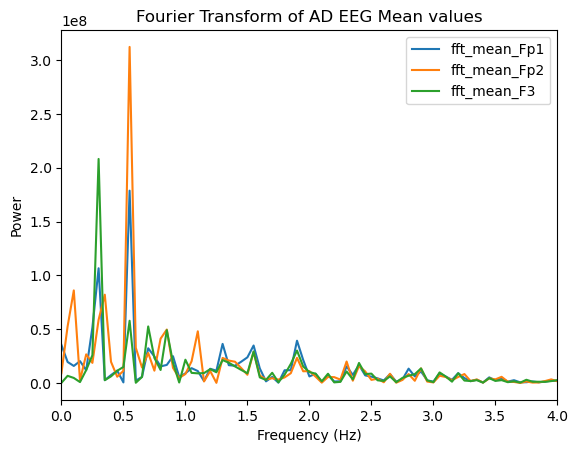

In [4]:
fft_AD_EEG = {}
t = np.arange(0, 500)

for column in averaged_AD_EEG_df:
    fft_AD_EEG[f'fft_{column}'] = np.fft.fft(averaged_AD_EEG_df[column])

fft_AD_EEG_df = pd.DataFrame(fft_AD_EEG)

freqs = np.fft.fftfreq(len(fft_AD_EEG_df), d=1/500)

for column in fft_AD_EEG_df.columns:
    freqs = freqs[freqs >= 0]
    plt.plot(freqs, np.abs(fft_AD_EEG_df[column][:len(freqs)]**2), label=column)

plt.title("Fourier Transform of AD EEG Mean values")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.xlim(0,4)

(0.0, 4.0)

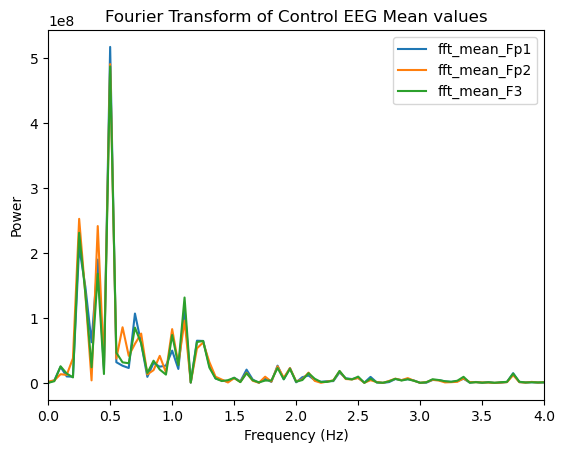

In [5]:
fft_Control_EEG = {}
t = np.arange(0, 500)

for column in averaged_Control_EEG_df:
    fft_Control_EEG[f'fft_{column}'] = np.fft.fft(averaged_Control_EEG_df[column])

fft_Control_EEG_df = pd.DataFrame(fft_Control_EEG)

freqs = np.fft.fftfreq(len(fft_Control_EEG_df), d=1/500)

for column in fft_Control_EEG_df.columns:
    freqs = freqs[freqs >= 0]
    plt.plot(freqs, np.abs(fft_Control_EEG_df[column][:len(freqs)]**2), label=column)

plt.title("Fourier Transform of Control EEG Mean values")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()
plt.xlim(0,4)